# 0.7_ss_chap6_compare_mnist
- mnistで各種　optimizerの違いをみて行く

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
%reload_ext autoreload

In [3]:
from src import utils
import itertools
import logging
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
from collections import OrderedDict
%matplotlib inline


In [15]:
from src.common.optimizer import SGD, Momentum, Nesterov, AdaGrad
from src.common.optimizer import RMSprop, Adam

from src.ch06.optimizer_compare_mnist import main
from src.common.gradient import numerical_gradient
from src.common.gradient import numerical_gradient_on_array
from src.common.util import smooth_curve
from src.common.multi_layer_net import MultiLayerNet
from src.dataset.mnist import load_mnist

In [5]:
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
# logging.basicConfig(level=logging.DEBUG, format=log_fmt)
logger = logging.getLogger()

## from optimizer_compare_mnist

2018-11-17 18:01:42,329 - src.ch06.optimizer_compare_mnist - INFO - 0:MNISTデータの読み込み==========
2018-11-17 18:01:42,703 - src.ch06.optimizer_compare_mnist - INFO - 1:実験の設定==========
2018-11-17 18:01:42,704 - src.ch06.optimizer_compare_mnist - INFO - Optimizers: {'SGD': <src.common.optimizer.SGD object at 0x124ef2860>, 'Momentum': <src.common.optimizer.Momentum object at 0x124e9d0f0>, 'AdaGrad': <src.common.optimizer.AdaGrad object at 0x11cff4128>, 'Adam': <src.common.optimizer.Adam object at 0x11cff40b8>}
2018-11-17 18:01:42,723 - src.ch06.optimizer_compare_mnist - INFO - 2:訓練の開始==========
2018-11-17 18:01:42,781 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 0 =====


SGD:2.311139604126428
Momentum:2.30699689193888
AdaGrad:2.101735454028222
Adam:2.1453674532618363


2018-11-17 18:01:45,171 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 100 =====


SGD:1.3767219383266356
Momentum:0.27032790487281183
AdaGrad:0.13504847805292552
Adam:0.21619236727682933


2018-11-17 18:01:47,588 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 200 =====


SGD:0.6294609955532944
Momentum:0.31541909629772197
AdaGrad:0.13585982942939984
Adam:0.1869007132759919


2018-11-17 18:01:49,969 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 300 =====


SGD:0.46525110733177716
Momentum:0.21341028675255447
AdaGrad:0.09301429159788702
Adam:0.15641226654242038


2018-11-17 18:01:52,364 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 400 =====


SGD:0.4724434712668494
Momentum:0.23382230363360162
AdaGrad:0.0983563592324106
Adam:0.18947923491290108


2018-11-17 18:01:54,875 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 500 =====


SGD:0.3006761646982964
Momentum:0.15805456834262518
AdaGrad:0.059004454205391764
Adam:0.1472565568814702


2018-11-17 18:01:57,454 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 600 =====


SGD:0.3417504619914417
Momentum:0.09475843926006491
AdaGrad:0.050318057184854985
Adam:0.04707014155782475


2018-11-17 18:02:00,061 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 700 =====


SGD:0.29746411658778993
Momentum:0.11201635043267222
AdaGrad:0.03878808106397856
Adam:0.10209338555861977


2018-11-17 18:02:02,605 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 800 =====


SGD:0.37263620470299336
Momentum:0.22331376969339778
AdaGrad:0.10156832617986868
Adam:0.19323032501041632


2018-11-17 18:02:05,097 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 900 =====


SGD:0.16348904317896845
Momentum:0.07955769951086769
AdaGrad:0.046449397993775246
Adam:0.07991616819380437


2018-11-17 18:02:07,784 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 1000 =====


SGD:0.21760467161389688
Momentum:0.07688839961282587
AdaGrad:0.047394111597995725
Adam:0.055441833053114606


2018-11-17 18:02:10,406 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 1100 =====


SGD:0.29213313521973344
Momentum:0.05508226996767793
AdaGrad:0.03698821709983447
Adam:0.019885258298579213


2018-11-17 18:02:13,059 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 1200 =====


SGD:0.34824312479450686
Momentum:0.15553650313542436
AdaGrad:0.10525185069021795
Adam:0.10431966236775331


2018-11-17 18:02:15,723 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 1300 =====


SGD:0.2373385187242751
Momentum:0.0697428071840711
AdaGrad:0.029209146841266437
Adam:0.02960650536735885


2018-11-17 18:02:18,333 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 1400 =====


SGD:0.197206835665745
Momentum:0.1193980349536952
AdaGrad:0.045019819138928274
Adam:0.09441097896385628


2018-11-17 18:02:21,033 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 1500 =====


SGD:0.3223850374383935
Momentum:0.07730678098386738
AdaGrad:0.03117178329470113
Adam:0.038928308262258314


2018-11-17 18:02:23,685 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 1600 =====


SGD:0.36489550472127585
Momentum:0.09506029610553138
AdaGrad:0.05835096953419874
Adam:0.05403129694082739


2018-11-17 18:02:26,217 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 1700 =====


SGD:0.247178550324051
Momentum:0.05329981404788088
AdaGrad:0.01653849376633551
Adam:0.06219065198832825


2018-11-17 18:02:28,818 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 1800 =====


SGD:0.2668482020100913
Momentum:0.07222997813789266
AdaGrad:0.04079291108108858
Adam:0.04671223158078969


2018-11-17 18:02:31,615 - src.ch06.optimizer_compare_mnist - INFO - ==== iteration: 1900 =====


SGD:0.27369987590051503
Momentum:0.08831224471318312
AdaGrad:0.045862647545545886
Adam:0.05715739023989623


2018-11-17 18:02:34,166 - src.ch06.optimizer_compare_mnist - INFO - 3.グラフの描画==========


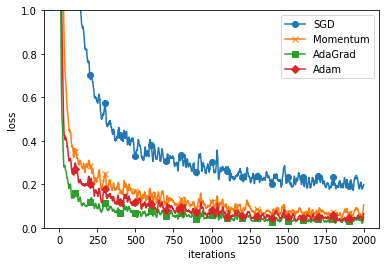

In [14]:
main()

In [16]:
(x_train, t_train), (x_test, y_test) = load_mnist(normalize=True)

In [18]:
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 20000
train_size

60000

In [21]:
optimizer = SGD()

In [23]:
network = MultiLayerNet(input_size=784, 
                        hidden_size_list=[100, 100, 100, 100],
                       output_size=10)

In [24]:
train_loss = []

### Train

In [57]:
import sys
from time import sleep
from tqdm import tqdm

In [61]:
progress_at = 100

In [72]:
def train_network(optimizer, 
                  batch_size=128, max_iterations=2000,
                  input_size=784, 
                  hidden_size_list=[100,100,100,100],
                  output_size=10):
        ''' Train network and return train_loss
        '''
        # get data
        (x_train, t_train), (x_test, y_test) = load_mnist(normalize=True)
        train_size = x_train.shape[0]
        
        # initialize network
        network = MultiLayerNet(input_size=input_size, 
                                hidden_size_list=hidden_size_list,
                                output_size=output_size)
        
        # Progress bar for tqdm
        progress_at = 100
        train_loss = []
        with tqdm(total=int(max_iterations/progress_at), 
                  file=sys.stdout) as pbar:
                for i in range(max_iterations):
                        # pbar.set_description(f"Iter {i}")
                        if (i % progress_at) == 0:
                                pbar.update(1)

                        # get batch
                        batch_mask = np.random.choice(train_size, 
                                                      batch_size)
                        x_batch = x_train[batch_mask]
                        t_batch = t_train[batch_mask]

                        grads = network.gradient(x_batch, t_batch)
                        optimizer.update(network.params, grads)

                        loss = network.loss(x_batch, t_batch)
                        train_loss.append(loss)
        
        return train_loss

In [64]:
with tqdm(total=int(max_iterations/progress_at), 
          file=sys.stdout) as pbar:
        for i in range(max_iterations):
                # pbar.set_description(f"Iter {i}")
                if (i % progress_at) == 0:
                        pbar.update(1)
                
                # get batch
                batch_mask = np.random.choice(train_size, batch_size)
                x_batch = x_train[batch_mask]
                t_batch = t_train[batch_mask]

                grads = network.gradient(x_batch, t_batch)
                optimizer.update(network.params, grads)

                loss = network.loss(x_batch, t_batch)
                train_loss.append(loss)

100%|██████████| 200/200 [01:50<00:00,  1.82it/s]


(0, 3)

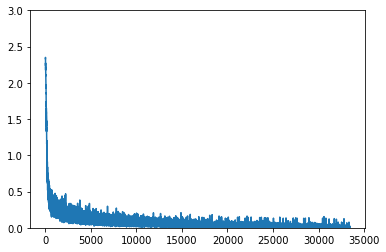

In [65]:
x = np.arange(len(train_loss))
plt.plot(x, train_loss)
plt.ylim(0, 3)

In [73]:
train_loss = train_network(SGD())

100%|██████████| 20/20 [00:09<00:00,  1.92it/s]


(0, 3)

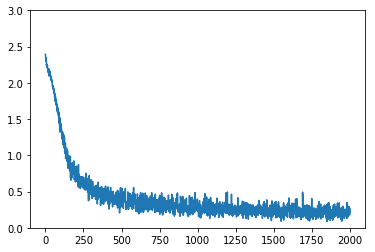

In [74]:
x = np.arange(len(train_loss))
plt.plot(x, train_loss)
plt.ylim(0, 3)

In [75]:
train_loss = train_network(Momentum())

100%|██████████| 20/20 [00:10<00:00,  1.80it/s]


(0, 3)

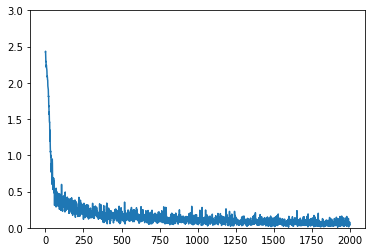

In [76]:
x = np.arange(len(train_loss))
plt.plot(x, train_loss)
plt.ylim(0, 3)

## Make a loop

In [77]:
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Momentum'] = Momentum()
optimizers['Adam'] = Adam()
optimizers['Nesterov'] = Nesterov()
optimizers['RMSprop'] = RMSprop()

In [78]:
train_loss = {}
for key in optimizers.keys():
        logging.info(f"Train: {key}")
        train_loss[key] = train_network(optimizers[key])

2018-11-18 13:31:41,425 - root - INFO - Train: SGD


100%|██████████| 20/20 [00:10<00:00,  1.84it/s]

2018-11-18 13:31:52,561 - root - INFO - Train: AdaGrad



100%|██████████| 20/20 [00:11<00:00,  1.53it/s]

2018-11-18 13:32:05,192 - root - INFO - Train: Momentum



100%|██████████| 20/20 [00:11<00:00,  1.57it/s]

2018-11-18 13:32:17,285 - root - INFO - Train: Adam



100%|██████████| 20/20 [00:12<00:00,  1.48it/s]

2018-11-18 13:32:30,899 - root - INFO - Train: Nesterov



100%|██████████| 20/20 [00:12<00:00,  1.63it/s]

2018-11-18 13:32:43,766 - root - INFO - Train: RMSprop



100%|██████████| 20/20 [00:11<00:00,  1.70it/s]


## Print

In [97]:
markers = {"SGD":"o",
          "Momentum":"x",
          "Nesterov":"x",
          "AdaGrad": "s",
          "RMSprop": "s",
          "Adam": "D"}

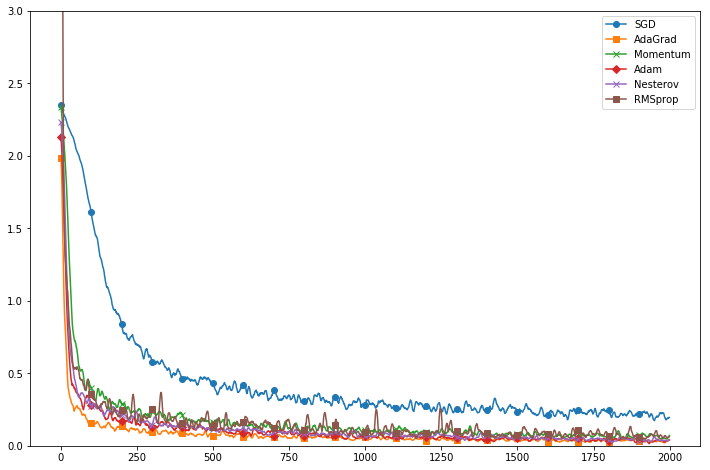

In [114]:
fig, ax = plt.subplots(figsize=(12, 8))
for key in optimizers.keys():
        x = np.arange(len(train_loss[key]))
        plt.plot(x, smooth_curve(train_loss[key]), label=key,
                 marker=markers[key], markevery=100)
        plt.ylim(0, 3)
        plt.legend()

In [107]:
np.convolve?

Signature: np.convolve(a, v, mode='full')
Docstring:
Returns the discrete, linear convolution of two one-dimensional sequences.

The convolution operator is often seen in signal processing, where it
models the effect of a linear time-invariant system on a signal [1]_.  In
probability theory, the sum of two independent random variables is
distributed according to the convolution of their individual
distributions.

If `v` is longer than `a`, the arrays are swapped before computation.

Parameters
----------
a : (N,) array_like
    First one-dimensional input array.
v : (M,) array_like
    Second one-dimensional input array.
mode : {'full', 'valid', 'same'}, optional
    'full':
      By default, mode is 'full'.  This returns the convolution
      at each point of overlap, with an output shape of (N+M-1,). At
      the end-points of the convolution, the signals do not overlap
      completely, and boundary effects may be seen.

    'same':
      Mode 'same' returns output of length ``max(M

In [108]:
np.r_?

Type:        RClass
String form: <numpy.lib.index_tricks.RClass object at 0x10fed61d0>
Length:      0
File:        ~/.pyenv/versions/3.7.0/envs/deep-learning-from-scratch/lib/python3.7/site-packages/numpy/lib/index_tricks.py
Docstring:  
Translates slice objects to concatenation along the first axis.

This is a simple way to build up arrays quickly. There are two use cases.

1. If the index expression contains comma separated arrays, then stack
   them along their first axis.
2. If the index expression contains slice notation or scalars then create
   a 1-D array with a range indicated by the slice notation.

If slice notation is used, the syntax ``start:stop:step`` is equivalent
to ``np.arange(start, stop, step)`` inside of the brackets. However, if
``step`` is an imaginary number (i.e. 100j) then its integer portion is
interpreted as a number-of-points desired and the start and stop are
inclusive. In other words ``start:stop:stepj`` is interpreted as
``np.linspace(start, stop, step, 

In [110]:
np.convolve([1,2,3, 1, 2, 3],[0,1,0.5], 'valid')

array([2.5, 4. , 2.5, 2.5])

In [113]:
smooth_curve(train_loss[key])

array([9.44140402, 9.24610612, 8.60646246, ..., 0.05884447, 0.06178042,
       0.06418053])